<a id='title'/>

# <center>Sentiment Analysis Using Neural Networks</center>
### <center>Javier Lopez</center>
---

## Table of Contents
---
Part I. <a href='#part1'>Research Question</a><br>
&emsp;A1. <a href='#a1'>Research Question</a><br>
&emsp;A2. <a href='#a2'>Objectives</a><br>
&emsp;A3. <a href='#a3'>Neural Network Identification</a><br>
Part II. <a href='#part2'>Data Preparation</a><br>
&emsp;B1. <a href='#b1'>Exploratory Data Analysis</a><br>
&emsp;&emsp;B1.1. <a href='#b1.1'>Presence of Unusual Characters</a><br>
&emsp;&emsp;B1.2. <a href='#b1.2'>Vocabulary Size</a><br>
&emsp;&emsp;B1.3. <a href='#b1.3'>Proposed Word Embedding Length</a><br>
&emsp;&emsp;B1.4. <a href='#b1.4'>Statistical Justification: Max. Sequence Length</a><br>
&emsp;B2. <a href='#b2'>Goals of the Tokenization Process</a><br>
&emsp;B3. <a href='#b3'>Sequence Padding</a><br>
&emsp;B4. <a href='#b4'>Categories of Sentiment and Activation Function</a><br>
&emsp;B5. <a href='#b5'>Data Preprocessing Steps</a><br>
&emsp;B6. <a href='#b6'>Prepared Dataset</a><br>
Part III. <a href='#part3'>Network Architecture</a><br>
&emsp;C1. <a href='#c1'>Model Summary Output</a><br>
&emsp;C2. <a href='#c2'>Network Layers and Parameters</a><br>
&emsp;C3. <a href='#c3'>Justification: Hyperparameters</a><br>
Part IV. <a href='#part4'>Model Evaluation</a><br>
&emsp;D1. <a href='#d1'>Impact of Using Stopping Criteria</a><br>
&emsp;D2. <a href='#d2'>Visualizations: Model Training Process</a><br>
&emsp;D3. <a href='#d3'>Model Fitness and Measures to Address Overfitting</a><br>
&emsp;D4. <a href='#d4'>Predictive Accuracy</a><br>
Part V. <a href='#part5'>Summary and Recommendations</a><br>
&emsp;E. <a href='#e'>Save the Trained Network</a><br>
&emsp;F. <a href='#f'>Neural Network Functionality</a><br>
&emsp;G. <a href='#g'>Recommended Course of Action</a><br>

## Part I: Research Question<a id='part1'/>
---

### A1. Research Question<a id='a1'/>
---
>How does sentiment expressed in Amazon product reviews correlate with product ratings, and how can we use this information to predict future product success?
---

### A2. Objectives<a id='a2'/>
---
>Our research question seeks to understand the relationship between the sentiment expressed in Amazon product reviews and the corresponding product ratings. More specifically, it aims to use this relationship to predict the future success of a product based on the sentiments expressed in its reviews.
>
>We've identified the following objectives to guide our data analysis:
>
>- **Sentiment Analysis:**<br>
>We aim to develop a robust mechanism to extract and quantify the sentiment present in product reviews. The sentiment may be positive, negative, or neutral.
><br><br>
>- **Correlation Assessment:**<br>
>Our next goal is to explore and understand the relationship between the expressed sentiment and the assigned product ratings. We want to ascertain if there's a clear correlation between the two, and the nature of this correlation, if it exists.
><br><br>
>- **Predictive Modeling:**<br>
>Based on the correlation established, we aspire to build a predictive model that can forecast the likely success of a product, given a set of reviews. Success can be defined in several ways, such as future sales or ratings, which we'll need to specify based on available data and business needs.
><br><br>
>- **Model Evaluation and Refinement:**<br>
>It's essential to rigorously evaluate our model's performance and make necessary refinements to enhance its predictive accuracy. We'll also be vigilant of common modeling pitfalls, such as overfitting.
><br><br>
>- **Business Insights Generation:**<br>
>Lastly, we aim to translate our findings into actionable business insights that can guide decision-making related to product development, marketing strategy, and customer experience management.
---

### A3. Neural Network Identification<a id='a3'/>
---
>One of the most popular types of neural networks for text classification tasks, such as sentiment analysis, is the Long Short-Term Memory network (LSTM), which is a type of Recurrent Neural Network (RNN).
>
>LSTMs are specifically designed to avoid the long-term dependency problem, which is the difficulty for an RNN in learning to connect past information to the present task, such as using past parts of a sequence to predict future parts. This makes them ideal for tasks involving sequential data, like text, where the order and context of words is important for understanding their meaning.
>
>An LSTM network can take the sequence of words in a review and learn to predict the sentiment based on the learned contextual meaning of the words. It does this by maintaining a 'cell state', or a kind of working memory, that it can add or remove information to over time. This allows it to keep or discard information over long sequences, making it very effective for this kind of task.
>
>An LSTM network can be trained on a dataset of Amazon reviews and their associated sentiments to produce useful predictions for the sentiment of new reviews. The model would take as input a sequence of words in a review and output a prediction for the sentiment of that review.
---

<div style="text-align: right"><a href='#title'>Scroll Up</a></div>

## Part II: Data Preparation<a id='part2'/>
---

### Import Libraries/Packages<a id='import'/>
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [16,10]
import seaborn as sns
sns.set_palette('colorblind')
import warnings
warnings.filterwarnings('ignore')

import re
from tensorflow import convert_to_tensor
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras import regularizers

2023-06-06 17:47:54.664946: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


### B1. Exploratory Data Analysis<a id='b1'/>
---

In [2]:
# Import data
df = pd.read_json('review-West_Virginia_10.json', lines=True)

In [3]:
# Review data shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080333 entries, 0 to 1080332
Data columns (total 8 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   user_id  1080333 non-null  float64
 1   name     1080333 non-null  object 
 2   time     1080333 non-null  int64  
 3   rating   1080333 non-null  int64  
 4   text     559223 non-null   object 
 5   pics     18588 non-null    object 
 6   resp     93149 non-null    object 
 7   gmap_id  1080333 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 65.9+ MB


In [4]:
# Keep relevant columns
df = df[['text', 'rating']]

In [5]:
# Remove observations with no text
df = df.dropna(subset='text')

In [6]:
# Review data shape
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 559223 entries, 0 to 1080186
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   text    559223 non-null  object
 1   rating  559223 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 12.8+ MB


In [7]:
# Remove numbers from text
def remove_numbers(text):
    return re.sub(r'\d+', '', text)

df['text'] = df['text'].apply(remove_numbers)

#### B1.1. Presence of Unusual Characters<a id='b1.1'/>
---
>Navigating through our dataset, we found 123,958 observations with unusual characters such as emojis and non-English symbols. These characters aren't just noise; they add layers of meaning to reviews. Emojis, for instance, can provide cues about sentiment, a smile indicating positivity, a frown the opposite.
---

In [8]:
# Define function to identify unusual characters
def has_unusual_chars(text):
    # usual characters to ignore
    if re.search(r'[^\w\s,.;:!?\-]', text):
        return True
    else:
        return False

In [9]:
# Create new column to identify observations with unusual characters
df['unusual_chars'] = df['text'].apply(has_unusual_chars)

In [10]:
# View identified characters
df[df['unusual_chars'] == True]

,text,rating,unusual_chars
0,Nice personnel and atmosphere and have done bu...,4,True
1,Maggie is awesome..very sweet & helpful.\nLadi...,5,True
15,Prices are good 👍 not an over abundance of foo...,3,True
23,I Paid For A Phone Online I Called Them A Week...,1,True
26,I'm in the process of purchasing a laptop thro...,1,True
...,...,...,...
1080151,It was so cold in there we couldn't eat and th...,2,True
1080155,Awesome 👍,4,True
1080171,☆☆,3,True
1080173,It's a Taco Bell.,3,True


In [11]:
# Quantify observations found
print(f'Percent of Observation with Unusual Characters: {round(df.unusual_chars.mean() * 100, 2)}%')

Percent of Observation with Unusual Characters: 22.17%


#### B1.2. Vocabulary Size<a id='b1.2'/>
---
>In our analysis, we've found that our word index comprises a total of 66,112 unique words. This substantial vocabulary size emphasizes the variety of language used in the Amazon reviews. It reflects the challenge our model faces in deciphering patterns, but also the potential depth of insight we can extract from these diverse expressions.
---

In [12]:
# Initialize a Tokenizer object
tokenizer = Tokenizer(num_words=10000)

In [13]:
# Fit the tokenizer on the text data
tokenizer.fit_on_texts(df['text'])

In [14]:
# Convert texts into sequences of integers and tokens
df['sequence'] = tokenizer.texts_to_sequences(df['text'])
df['seq_text'] = tokenizer.sequences_to_texts(df['sequence'])

In [15]:
# Count the word index
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

Found 66112 unique tokens.


#### B1.3. Proposed Word Embedding Length<a id='b1.3'/>
---
>The decision to choose a specific word embedding length predominantly revolves around the compromise between computational efficiency and the volume of information the embedding can contain. An embedding length ranging between 100 and 300 dimensions is a common choice in numerous natural language processing tasks. Regarded as a hyperparameter of the model, the embedding length can be adjusted to achieve optimal performance. Given the intricacy of our text, a dimension of 200 emerges as a favored balance, harmonizing the complexity of the text with the computational resources we have allocated.
---

#### B1.4 Statistical Justification: Max. Sequence Length<a id='b1.4'/>
---
>The maximum sequence length is a crucial parameter that requires thoughtful setting when training a sequence model like an LSTM. One approach to determining this parameter is by examining the distribution of sequence lengths within the data. Inferences drawn from the summary statistics and the histogram plot reveal that 95% of all reviews possess a sequence length of 55 tokens. Thus, we plan to utilize 55 as the maximum sequence length, an approach that allows us to encapsulate most of the data without inducing overfitting to the model.
---

In [16]:
# Calculate sequence lengths
df['seq_length'] = df['sequence'].apply(len)
df.drop('sequence', axis=1, inplace=True)

In [17]:
# Print summary statistics
print(df['seq_length'].describe())

count    559223.000000
mean         15.839527
std          24.808487
min           0.000000
25%           4.000000
50%           8.000000
75%          18.000000
max         778.000000
Name: seq_length, dtype: float64


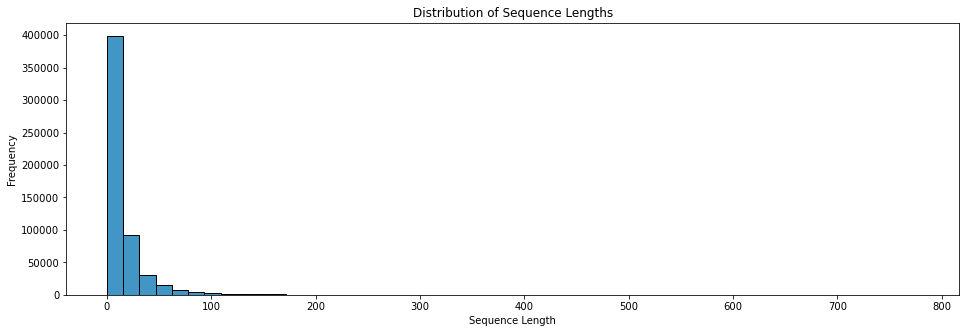

In [18]:
plt.rcParams['figure.figsize'] = [16,5]
# Visualize distribution of sequence lengths
sns.histplot(data=df['seq_length'], bins=50)
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.show()
plt.rcParams['figure.figsize'] = [16,10]

In [19]:
# Identify the 95th percentile of sequence lengths
max_seq = int(df.seq_length.quantile(0.95))
print(f'Chosen Maximum Sequence Length: {max_seq} tokens')

Chosen Maximum Sequence Length: 55 tokens


### B2. Goals of the Tokenization Process
---
>Tokenization is the technique of dividing text into pieces, commonly known as tokens. These tokens could range from sentences and words to subwords or even individual characters.
>
>The principal objectives we aim to achieve with tokenization include:
>
>- Disassembling text into tokens, which subsequently become the fundamental units of text that the machine learning model can comprehend and learn from.
>- Removing punctuation and unnecessary or special characters that do not offer beneficial information for our model. The keras Tokenization function is specifically tailored to manage this process seamlessly.
>- Transforming words to lowercase to ensure that identical words in different cases are recognized as the same. The keras Tokenization function effortlessly facilitates this process.
>- Removing HTML tags or other unique substrings that may be present due to web scraping. Again, the keras Tokenization function proves to be proficient at handling this task.
>
>Normalization forms an additional process with the ultimate aim of converting the text into a standardized or regular format. This reduction of data complexity allows the machine learning model to more effectively learn from it.
>
>Our key objectives for normalization include:
>
>- Implementing lemmatization, a process that reduces inflected or occasionally derived words to their root or stem form. For example, "runs", "running", "ran" are all different forms of the word "run".
>- Removing stop words such as "is", "the", and "in", which typically lack substantial meaningful information."
---

In [20]:
# Tokenize text sequence
df['tokens'] = df['seq_text'].apply(word_tokenize)

In [21]:
# Initialize a WordNetLemmatizer object
lemmatizer = WordNetLemmatizer()

In [22]:
# Define a function to lemmatize tokens
def lemmatize_words(words):
    return [lemmatizer.lemmatize(word) for word in words]

In [23]:
# Convert words into their root forms
df['lemmatized'] = df['tokens'].apply(lemmatize_words)

In [24]:
stop_words = set(stopwords.words('english'))

# Define function to remove stop words
def remove_stopwords(words):
    return [word for word in words if word not in stop_words]

In [25]:
# Remove stop words from tokenized text
df['filtered'] = df['lemmatized'].apply(remove_stopwords)

### B3. Sequence Padding<a id='b3'/>
---
>Padding is an indispensable preprocessing stage that ensures all sequences, or lists of tokens, within a dataset maintain a uniform length. This uniformity is a prerequisite as most machine learning models mandate their input to have a consistent shape. If sequences fall short of a certain length, padding steps in to fill the remaining spaces with 0, whereas sequences exceeding the length are generally truncated to match it.
>
>- We first decide on a sequence length. Choosing the sequence length often involves a trade-off: if it's too short, we might lose useful information; if it's too long, we might introduce too much noise from the extra padding.
><br><br>
>- We then use the Keras pad_sequences function to apply padding to the sequences. The function takes a list of sequences (list of lists) and transforms them all into sequences of the same length.
>
>The decision between pre-padding and post-padding holds significant relevance when working with LSTM networks. Given their gating mechanisms, these networks may potentially "forget" information from earlier in the sequence. Consequently, it's generally more effective to pad at the sequence's beginning (pre-padding), as the network might not pay much attention to padding tokens.
---

In [26]:
# Fit the tokenizer on the text data
tokenizer.fit_on_texts(df['filtered'])

In [27]:
# Count the word index
word_index = tokenizer.word_index
print(f'Found {len(word_index)} unique tokens.')

Found 66134 unique tokens.


In [28]:
# Sequence the filtered text
df['seq'] = tokenizer.texts_to_sequences(df['filtered'])

In [29]:
# Pad sequences
padded_sequences = pad_sequences(df['seq'].values, maxlen=max_seq)

In [30]:
# Single sequence
df.loc[0]['filtered']

['nice',
 'personnel',
 'atmosphere',
 'done',
 'business',
 'several',
 'year',
 'feel',
 'free',
 'delivery',
 'repeat',
 'customer',
 'charge',
 'additional',
 'customer',
 'service',
 'go',
 'selling']

In [31]:
# Single padded sequence
padded_sequences[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,   17, 1967,   87,  239,  251,  347,  197,
        288,  281,  658, 2267,   88,  731, 2101,   88,    8,   36, 1747],
      dtype=int32)

### B4. Categories of Sentiment and Activation Function<a id='b4'/>
---
> We will be doing multi-class classification (positive, neutral, and negative sentiment), where we will have 3 categories. To achieve this, we will encode the rating column (our target variable) as follows:
>- Negative (rating 1 and 2), Encoded as [1,0,0]
>- Neutral (rating 3), Encoded as [0,1,0]
>- Positive (rating 4 and 5), Encoded as [0,0,1]
>
>The final dense layer of the network will have 3 neurons, one for each class, and will use the softmax activation function, which outputs a probability distribution over the classes.
---

In [32]:
# Label and encode ratings
rating_dict = {
    1: 'Negative',
    2: 'Negative',
    3: 'Neutral',
    4: 'Positive',
    5: 'Positive'
}

df['class_rating'] = df['rating'].map(rating_dict)

In [33]:
# One-hot encode classes
df_encoded = pd.get_dummies(df['class_rating'])

In [34]:
df_encoded.head()

,Negative,Neutral,Positive
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
6,0,0,1


### B5. Data Preprocessing Steps<a id='b5'/>
---
>**Data Cleaning:**
Our initial step involves addressing missing values, eliminating duplicates, and checking for data inconsistencies. In this scenario, it's essential to discard any reviews devoid of text.
>
>**Data Transformation:**
This phase involves reformatting our data into a format that's suitable for analysis. 
>
>Specifically, it entails several sub-steps:
>
>- **Text Normalization:** We'll transform all text into lowercase and eliminate punctuation.
>- **Text Tokenization:** This involves deconstructing the reviews into individual words or tokens.
>- **Removing Stop Words:** This step discards common words that carry minimal meaningful information, like 'the', 'a', 'in', etc.
>- **Stemming/Lemmatization:** We'll condense words to their root or base form (for example, 'running' becomes 'run').
>- **Encoding Text:** Here, we convert words into integers or vectors that serve as input for our neural network.
>- **Encoding Labels:** This involves converting sentiment labels into one-hot vectors.
>- **Padding Sequences:** We ensure all our text sequences possess uniform length by padding shorter ones with zeros.
>
>**Data Splitting:** We'll divide the dataset into a training set, a validation set, and a test set. The training set is employed to train the model, the validation set aids in tuning parameters and adjusting model settings during training, and the test set evaluates the final model. Generally, a 70% split is allocated for training, 15% for validation, and 15% for testing.

---

In [35]:
# Define the X and y values
X = padded_sequences
y = df_encoded.values

In [36]:
# Split training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

### B6. Prepared Dataset<a id='b6'/>
---

In [37]:
# Concatenate X and y into one DataFrame
df_sequences = pd.DataFrame(X)
df_clean = pd.concat([df_sequences, df_encoded.reset_index(drop=True)], axis=1)

df_clean

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,Negative,Neutral,Positive
0,0,0,0,0,0,0,0,0,0,0,...,88,731,2101,88,8,36,1747,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,412,14,19,2465,822,217,109,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,63,236,314,14,40,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,131,9,975,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,2293,3969,912,3,63,1632,786,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
559218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,8,0,1,0
559219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,5,8,0,0,1
559220,0,0,0,0,0,0,0,0,0,0,...,0,0,0,29,362,588,498,0,0,1
559221,0,0,0,0,0,0,0,0,0,0,...,0,0,32,1929,785,432,443,0,0,1


In [38]:
# Store the cleaned dataset
df_clean.to_json('clean_reviews.json')

<div style="text-align: right"><a href='#title'>Scroll Up</a></div>

## Part III: Network Architecture<a id='part3'/>
---

### C1. Model Summary Output<a id='c1'/>
---

In [39]:
# Initialize a Sequential model object
model = Sequential([
    Embedding(input_dim=len(word_index), output_dim=200, input_length=max_seq),
    LSTM(128, return_sequences=True),
    Dropout(0.5),
    LSTM(128),
    Dense(64, activation='relu', 
          kernel_regularizer=regularizers.l2(0.01), 
          activity_regularizer=regularizers.l1(0.01)),
    Dense(3, activation='softmax')  # number of classes (sentiment categories)
])

2023-06-06 17:49:34.771757: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [40]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 55, 200)           13226800  
                                                                 
 lstm (LSTM)                 (None, 55, 128)           168448    
                                                                 
 dropout (Dropout)           (None, 55, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 128)               131584    
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 13,535,283
Trainable params: 13,535,283
No

### C2. Network Layers and Parameters<a id='c2'/>
---
>- **Embedding Layer**<br>
>Our embedding layer functions as a look-up table that transitions from integer indices (representing specific words) to dense vectors. With the bulk of our parameters (13,226,800), this layer is responsible for fabricating a 200-dimensional vector for each word in our vocabulary. The 'None' in the output shape signifies this layer's capability to accept sequences of any length.
><br><br>
>- **LSTM Layers**<br>
>Our architecture includes two LSTM layers with 128 units each. These layers are adept at managing sequential data, maintaining a memory of preceding inputs in the sequence. This feature is invaluable for sentiment analysis, where the sentence context is of crucial importance. Our initial LSTM layer is configured to return sequences, meaning it outputs a sequence identical in length to the input, enabling information passage to the next LSTM layer.
><br><br>
>- **Dropout Layer**<br>
>To curb overfitting, we've incorporated a dropout layer. This layer randomly assigns zero to a fraction (50% in our case) of input units at each update during training time, a step that aids in preventing overfitting.
><br><br>
>- **Dense Layers**<br>
>In conclusion, we have two dense layers. The first houses 64 units and utilizes the 'ReLU' activation function. To further deter overfitting, this layer also carries L1 and L2 regularization, applying penalties to the layer's output and weights respectively. These penalties deter overly complex or extreme values, encouraging more generalizable data patterns. Our final dense layer is the output layer, featuring 3 units corresponding to the three sentiment classes we're predicting ('Negative', 'Neutral', 'Positive'). This layer leverages the 'softmax' activation function, delivering a probability distribution over the three classes.
><br><br>
>- **Total Parameters**<br>
>Altogether, our model possesses 13,535,283 parameters, all of which are trainable. The substantial quantity of parameters mainly originates from our embedding layer. Trainable parameters are those that the model assimilates from the training data, whereas non-trainable parameters remain static during training (our current model lacks any of these).
---

### C3. Justification: Hyperparameters<a id='c3'/>
---
>- **Activation functions**<br>
We opted for the 'ReLU' (Rectified Linear Unit) activation function for the penultimate layer as it assists in addressing the vanishing gradient issue, a common phenomenon in deep neural networks. It's computationally efficient and performs reliably in numerous scenarios. For our output layer, we deployed the 'softmax' function, a standard choice for multiclass classification tasks, as it outputs a probability distribution over our target classes ('Negative', 'Neutral', 'Positive').
><br><br>
>- **Number of nodes per layer**<br>
We've set the LSTM layers to house 128 nodes each, with our dense layer containing 64. These quantities strike a balance between computational efficiency and the model's ability to learn intricate patterns. These figures are flexible, however, and may require adjustments depending on the task's performance.
><br><br>
>- **Loss function**<br>
We've employed 'categorical_crossentropy' as our loss function, a conventional choice for multiclass classification problems. It quantifies the dissimilarity between our predicted probability distribution and the actual distribution.
><br><br>
>- **Optimizer**<br>
The 'adam' optimizer was chosen for its computational efficiency and modest memory demands. It's particularly suitable for problems involving substantial data and/or parameters. 'Adam' adjusts the learning rate for each weight individually, automating the tuning of the learning rate, which typically yields reliable results in practice.
><br><br>
>- **Stopping criteria**<br>
We have implemented early stopping, a regularization technique used to avoid overfitting when training a learner with an iterative method such as gradient descent. This method suspends the training process if the model's performance on the validation set does not improve for a certain number of epochs. In our case, this was an essential criterion to ensure our model does not overfit the training data.
><br><br>
>- **Evaluation metric**<br>
'Accuracy' was chosen as our evaluation metric for its simplicity and widespread use in classification tasks. It calculates the ratio of correct predictions to total predictions. If our data is imbalanced, we might want to explore other metrics such as precision, recall, or F1-score, as these can provide a more comprehensive understanding of our model's performance across diverse classes.
---

In [42]:
# Define validation set and convert to Tensor
stop = int(len(X_test)/2)

X_train = convert_to_tensor(X_train)
X_val = convert_to_tensor(X_test[:stop])
X_test = convert_to_tensor(X_test[stop:])

y_train = convert_to_tensor(y_train)
y_val = convert_to_tensor(y_test[:stop])
y_test = convert_to_tensor(y_test[stop:])

<div style="text-align: right"><a href='#title'>Scroll Up</a></div>

## Part IV: Model Evaluation<a id='part4'/>
---

### D1. Impact of Using Stopping Criteria<a id='d1'/>
---
>Implementing early stopping as a criterion during our model's training process was a strategic decision to enhance model performance. By setting a defined number of epochs, we may run the risk of overfitting if the model trains for too long and begins to capture noise and inconsistencies in the training set. Alternatively, we could underfit the model if the training duration is inadequate, thereby missing out on vital patterns in the data.
>
>By implementing early stopping, we made our model more dynamic. The model was set to halt its training if it didn't register any improvement in the validation loss for a specific number of consecutive epochs. This approach makes the most of our training data by using it just as long as it is beneficial. Therefore, the model can autonomously decide when training ceases, ensuring an optimal balance between underfitting and overfitting. As seen from the final training epoch, early stopping efficiently halted the process once the validation loss ceased to improve.
---

In [43]:
# Create early stopping object
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, mode='auto')

In [44]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=100, # Set large number of epochs to ensure the early-stopping function is invoked
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

Epoch 1/100
12233/12233 [==============================] - 1189s 97ms/step - loss: 0.4067 - accuracy: 0.8559 - val_loss: 0.3722 - val_accuracy: 0.8663
Epoch 2/100
12233/12233 [==============================] - 1182s 97ms/step - loss: 0.3542 - accuracy: 0.8715 - val_loss: 0.3569 - val_accuracy: 0.8694
Epoch 3/100
12233/12233 [==============================] - 1150s 94ms/step - loss: 0.3356 - accuracy: 0.8776 - val_loss: 0.3583 - val_accuracy: 0.8683
Epoch 4/100
12233/12233 [==============================] - 1155s 94ms/step - loss: 0.3210 - accuracy: 0.8829 - val_loss: 0.3585 - val_accuracy: 0.8679
Epoch 5/100
12233/12233 [==============================] - 1171s 96ms/step - loss: 0.3081 - accuracy: 0.8879 - val_loss: 0.3629 - val_accuracy: 0.8675
Epoch 5: early stopping


In [45]:
# Log the training results
results = pd.DataFrame(history.history)
results

,loss,accuracy,val_loss,val_accuracy
0,0.406704,0.855938,0.372153,0.866338
1,0.354234,0.871464,0.356870,0.869366
2,0.335577,0.877603,0.358325,0.868305
3,0.320968,0.882934,0.358550,0.867947
4,0.308078,0.887911,0.362867,0.867518


### D2. Visualizations: Model Training Process<a id='d2'/>
---
>In the plots showcasing our model's training process, we get a vivid picture of how our model learned over time.

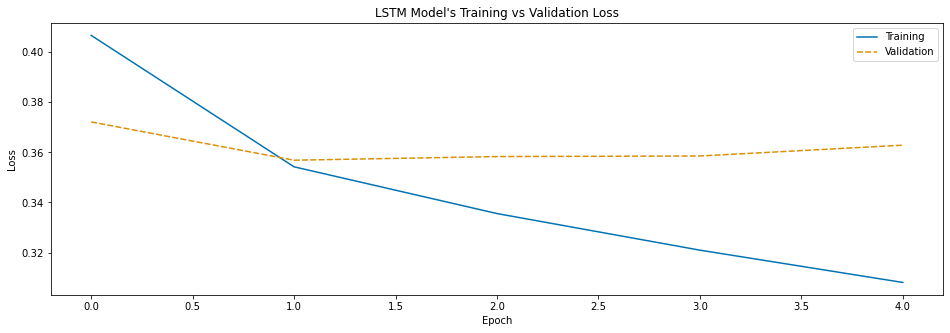

In [46]:
plt.rcParams['figure.figsize'] = [16,5]
# Plot loss
sns.lineplot(data=results[['loss', 'val_loss']])
plt.title('LSTM Model\'s Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training', 'Validation'])
plt.show()
plt.rcParams['figure.figsize'] = [16,10]

>The loss plot reveals how the model consistently improved its ability to predict sentiment with each epoch, both on the training and validation sets. It's notable that the validation loss began to plateau and even slightly increase towards the end, indicating that the model was beginning to overfit.

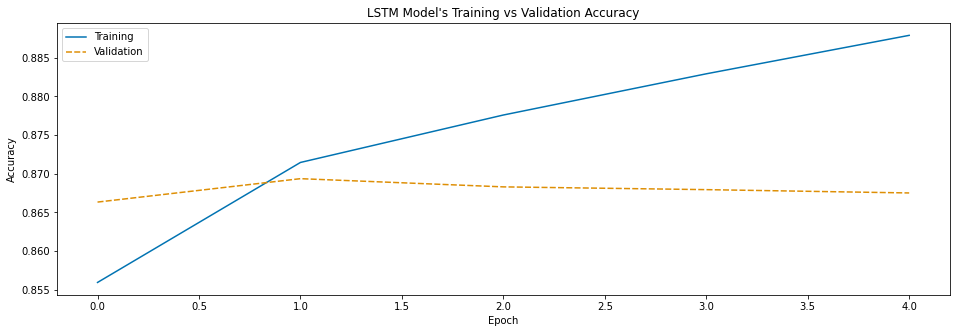

In [48]:
plt.rcParams['figure.figsize'] = [16,5]
#Plot accuracy
sns.lineplot(data=results[['accuracy', 'val_accuracy']])
plt.title('LSTM Model\'s Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training', 'Validation'])
plt.show()
plt.rcParams['figure.figsize'] = [16,10]

>The accuracy plot complements the loss plot, illustrating the model's increasing proficiency in correctly predicting sentiment as training progressed.
---

### D3. Model Fitness and Measures to Address Overfitting<a id='d3'/>
---
>The model, as a whole, demonstrates a good fit. It exhibits a gradual learning curve and manages to achieve a high accuracy on the training set. However, we noted signs of overfitting towards the end of the training process, where the validation loss started to increase, and validation accuracy plateaued. To counteract this, we implemented early stopping, which halted training once the model stopped improving on the validation set. Additionally, we incorporated dropout layers and L1 and L2 regularization within our model. These techniques randomly deactivate neurons and apply penalties to the model's weights, respectively, preventing the model from relying too much on any single pattern and encouraging it to find more generalizable underlying patterns.
---

### D4. Predictive Accuracy<a id='d4'/>
---
>Our neural network has shown a commendable predictive accuracy of about 86.95% on unseen test data. This suggests that the model is proficient in its sentiment prediction capabilities when applied to real-world scenarios. However, it's important to bear in mind that even with this encouraging result, there's always room for refinement in the ever-evolving landscape of machine learning.
---

In [49]:
# Evaluate the model on the test data
print('Evaluate on test data')
test_results = model.evaluate(X_test, y_test, batch_size=32)
print('Test loss, Test accuracy:', test_results)

Evaluate on test data
2622/2622 [==============================] - 56s 21ms/step - loss: 0.3621 - accuracy: 0.8695
Test loss, Test accuracy: [0.3621439039707184, 0.869510293006897]


<div style="text-align: right"><a href='#title'>Scroll Up</a></div>

## Part V: Summary and Recommendations<a id='part5'/>
---

### E. Save the Trained Network<a id='e'/>
---

In [50]:
# Save the trained network
model.save('lstm_model.h5')  # create an HDF5 file 'lstm_model.h5'

In [51]:
# Load the model
loaded_model = load_model('lstm_model.h5')

### F. Neural Network Functionality<a id='f'/>
---
>Our neural network is structured to effectively handle the complex task of sentiment analysis on textual data. The architectural choices play an instrumental role in the model's efficacy, shaping how well it learns from our data, generalizes to unseen examples, and ultimately performs sentiment prediction. Starting off with the Embedding layer, this look-up table allows us to translate word indices into their corresponding vector representations. This layer is crucial as it enables our model to understand the semantic meaning embedded in each word and interpret how different words relate to one another. It's worth noting that the lion's share of our model's parameters resides in this layer due to its responsibility of crafting a 200-dimensional vector for each word in our vocabulary.
>
>Moving on, the sequential nature of our textual data demanded the implementation of LSTM layers. With their ability to remember past inputs via internal memory, LSTM layers adeptly handle the dependencies between words in a sentence - an indispensable capability for sentiment analysis, as the sentiment often relies heavily on the context provided by the preceding words. The decision to use two LSTM layers augments the network's capacity to extract and interpret complex structures in the data. To mitigate overfitting, we strategically inserted a Dropout layer, which randomly sets a portion of its inputs to zero during each training step. This encourages the model to learn more robust, generalizable patterns in the data and lessens its tendency to over-rely on specific features.
>
>The dense layers, or fully connected layers, act as the decision-making head of our network. The penultimate layer, with its 64 nodes, transforms the high-level features extracted by the preceding layers into a form suitable for final classification. By incorporating L1 and L2 regularization, we've ensured this layer doesn't produce overly complex or extreme values, further bolstering our model's generalizability. Our final layer houses three nodes corresponding to the three sentiment classes we're predicting. Utilizing the 'softmax' activation function, this layer effectively churns out a probability distribution over the classes, enabling us to identify the most probable sentiment for a given input review.
>
>As a whole, our network's architecture is designed to handle the intricate task of sentiment analysis with grace. It intelligently combines the ability to understand semantic meanings, remember crucial context, generalize well, and make informed decisions based on the learned patterns. Each architectural choice has a tangible impact on our model's performance and has been meticulously considered to ensure our model's success in sentiment prediction.
---

### G. Recommended Course of Action<a id='g'/>
---
>Upon reflecting on the results and observations made during our exploration of sentiment analysis with LSTM networks, I would recommend the following course of action:
>
>- **Experimentation with Network Architecture:**<br>
>Our current model demonstrates respectable performance, but there's always room for improvement. By varying the number of LSTM layers or their units, we could explore how these adjustments influence our model's accuracy. The addition of Bidirectional LSTMs, for instance, might enable the model to learn from both past and future context.
><br><br>
>- **Hyperparameter Tuning:**<br>
>Experimenting with the model's hyperparameters, such as batch size, learning rate, or the dropout rate, could result in improved model performance. Grid Search or Random Search methods could be employed to systematically identify the optimal combination of these hyperparameters.
><br><br>
>- **Improved Handling of Imbalanced Classes:**<br>
>Our model seemed to struggle slightly more with neutral reviews. Techniques like oversampling, undersampling, or generating synthetic samples could be explored to handle the class imbalance better, potentially enhancing the model's performance, particularly for underrepresented classes.
><br><br>
>- **Enriched Preprocessing:**<br>
>Investigating other text preprocessing techniques like more sophisticated tokenization, employing n-grams, or better handling of negations could lead to more effective feature extraction, subsequently boosting our model's ability to discern sentiments.
><br><br>
>- **Transfer Learning:**<br>
>Leveraging pre-trained word embeddings like Word2Vec or GloVe, or even more advanced language models like BERT, could enhance our model's understanding of semantic meanings, likely improving the sentiment prediction capabilities.
>
>Through a combination of these tactics, we could refine our sentiment analysis model, ensuring it not only maintains its robust performance on the current dataset but also generalizes well to other similar tasks, bolstering its overall utility in real-world applications.

<div style="text-align: right"><a href='#title'>Scroll Up</a></div>